## Abstract

This document provides a brief overview of the features available for authors. It appears in the navigation bar under *Demo* and exists to help authors during development of their pub. It is removed as a pre-publishing step.

## Introduction

This notebook demos some key features. For a more extensive resource, see Quarto's [excellent documentation](https://quarto.org/docs/guide/).

## Text

### Headers

`h1` headers (`# <HEADER-TEXT>`) are reserved for the title of the pub, so use `h2` (`## <HEADER-TEXT>`) for section titles and `h3`, `h4`, *etc*. for sub-sections.

### Callouts

To draw more attention to a piece of text, use [callouts](https://quarto.org/docs/authoring/callouts.html):

::: {.callout-important}
The most effective way to see the rendered pub is to setup a live preview that re-renders the pub whenever you save this file. Do that with `make preview`.
:::

### Citations & Footnotes

To cite something, add its bibtex entry to `ref.bib` and then cite it [@Avasthi2024Early]. Here's another [@lin_evolutionary-scale_2023]. For in-depth description of available citation syntax, visit [Quarto's documentation](https://quarto.org/docs/authoring/citations.html#sec-citations).

Also, don't forget about footnotes[^footnotes].

[^footnotes]: To add additional information, like what you're reading right now, use [footnotes](https://quarto.org/docs/authoring/markdown-basics.html#footnotes).

    To create a multi-paragraph footnote, indent subsequent paragraphs. Footnotes can also cite things [@Avasthi2024Early].

## Math

Render math[^mathjax] using standard $\LaTeX$ syntax. Inline with `$...$` and display with `$$...$$`.

$$
e^{ \pm i\theta } = \cos \theta \pm i\sin \theta
$$ {#eq-euler}

Euler's equation (@eq-euler) is pretty.

[^mathjax]: Quarto uses [MathJax](https://www.mathjax.org/) for math rendering.

## Code

Write code as you would in any Jupyter notebook.

In [1]:
def alertness(hours_sleep, coffees):
    base_alertness = min(hours_sleep / 8 * 100, 100)
    coffee_boost = min(coffees * 30, 60)
    total = min(base_alertness + coffee_boost, 100)
    return round(total, 1)


print("Alertness stats:")
print(f"4hrs sleep + 1 coffee: {alertness(4, 1)}%")
print(f"8hrs sleep + 0 coffee: {alertness(8, 0)}%")
print(f"2hrs sleep + 3 coffee: {alertness(2, 3)}%")

Alertness stats:
4hrs sleep + 1 coffee: 80.0%
8hrs sleep + 0 coffee: 100.0%
2hrs sleep + 3 coffee: 85.0%


### Visibility & Placement

Specify per-block instructions with comments at the top of the code block.

Fold the code block (`#| code-fold: true`):

In [2]:
# | code-fold: true
# | code-summary: "Source code for this table"
import pandas as pd

df = pd.DataFrame({"a": [1, 2, 3], "b": [True, True, False], "c": ["marco", "polo", "marco"]})
df

,a,b,c
0,1,True,marco
1,2,True,polo
2,3,False,marco


Suppress code block visibility while retaining the cell output (`#| echo: false`):

::: {.callout-note}
The code block below runs and the output is visible, but the code itself is absent from the rendering.
:::

In [3]:
# | echo: false
print("The code that generated this print statement is hidden.")

The code that generated this print statement is hidden.


Render the output in different places, like in the right margin (`#| column: margin`):

In [4]:
# | column: margin
df

,a,b,c
0,1,True,marco
1,2,True,polo
2,3,False,marco


In general, content placement in highly customizable. For more options, see this [Quarto resource](https://quarto.org/docs/authoring/article-layout.html).

### Annotation

You can annotate lines of code. Lines will reveal their annotation when the user hovers over the circled number on the right hand side of the code block.

In [5]:
def alertness(hours_sleep, coffees):
    base_alertness = min(hours_sleep / 8 * 100, 100)  # <1>
    coffee_boost = min(coffees * 20, 60)  # <2>
    total = min(base_alertness + coffee_boost, 100)  # <3>
    return round(total, 1)

1. Scale to percentage, cap at 100
2. Each coffee adds 20%, max 60% boost
3. Cap total at 100%

For details, see Quarto's [code annotation documentation](https://quarto.org/docs/authoring/code-annotation.html).

### Codebase

You can choose to either fold (`#| code-fold: true`) or supress (`#| echo: false`) code snippets that distract from the narrative. However, if you've written an extensive amount of code, it may be more practical to define it in a package that this notebook imports from, rather than defining it in the notebook itself. This project is already set up to import from packages found in the `src/` directory, so place any such code there. As an example, this code block imports code from a placeholder `analysis` package found at `src/analysis`.

In [6]:
from analysis import polo_if_marco  # <1>

polo_if_marco("marco")

'polo'

1. [Source code]()

If you want to package any of your code for the purposes of simplifying this notebook, replace the contents of `src/analysis/` with your own package.

## Figures & Tables

### Captions & Labeling

In general, if a cell output is a figure or table, you should caption and label it.

In [7]:
# | label: tbl-small-table
# | tbl-cap: "This is a small table."
df

,a,b,c
0,1,True,marco
1,2,True,polo
2,3,False,marco


This is how you reference @tbl-small-table.

::: {.callout-note}
If the cell output is a table, the label ID should be prefixed with `tbl-`. If it's a figure, prefix with `fig-`.

For example, a table could be captioned and labeled with:

```python
#| label: tbl-small-table
#| tbl-cap: "This is a small table."
```

And a figure could be captioned and labeled with:

```python
#| label: fig-some-figure
#| fig-cap: "This is some figure."
```
:::

If your code block produces several plots, you can subcaption each:

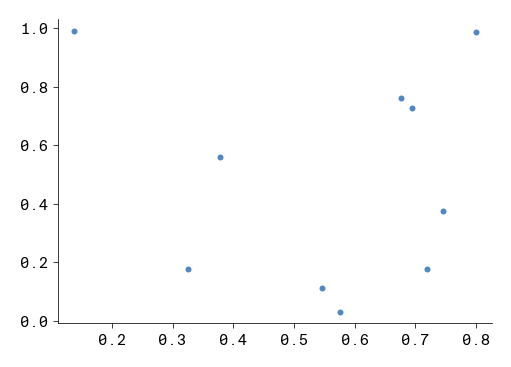

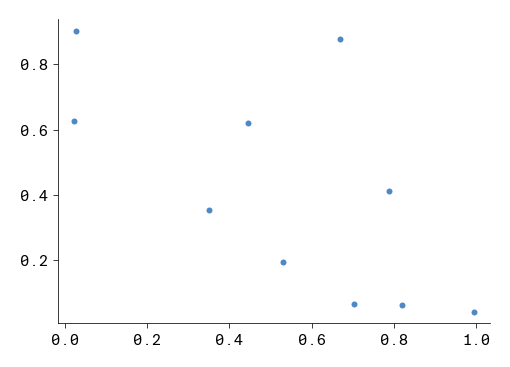

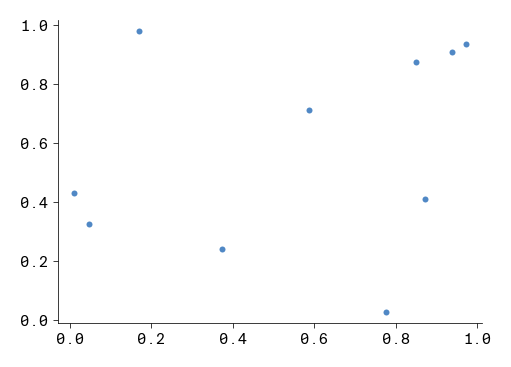

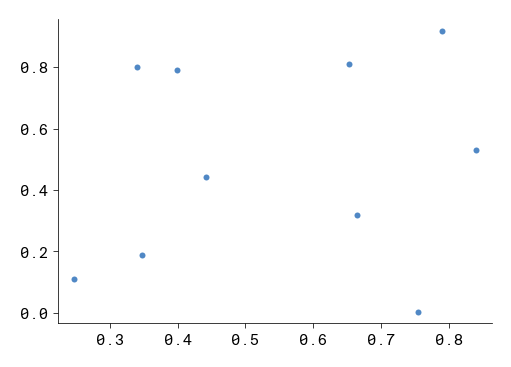

In [8]:
# | label: fig-random-scatter-plots
# | layout-ncol: 2
# | fig-cap: "A panel of scatter plots."
# | fig-subcap:
# |   - "This is the first plot."
# |   - "This is the second."
# |   - "The third."
# |   - "And finally, here's the fourth."
# | fig-alt:
# |   - "Add brief alt text: [Chart type] of [type of data] where [reason for including]."
# |   - "Second scatter plot of 10 random points showing uniform distribution with no correlation."
# |   - "Third scatter plot of 10 random points showing uniform distribution with no correlation."
# |   - "Fourth scatter plot of 10 random points showing uniform distribution with no correlation."
import arcadia_pycolor as apc
import matplotlib.pyplot as plt
import numpy as np

apc.mpl.setup()


def random_plot():
    plt.figure()
    plt.scatter(np.random.rand(10), np.random.rand(10), marker="o")
    apc.mpl.style_plot(monospaced_axes="both")
    plt.tight_layout()
    plt.show()
    plt.close()


for _ in range(4):
    random_plot()

@fig-random-scatter-plots is just one example layout for multi-panel figures. For more customization options, see Quarto's documentation on [figures](https://quarto.org/docs/authoring/figures.html).

### Interactivity

Interactive widgets can be used. For example, [Plotly](https://plotly.com/python/):

In [9]:
import plotly.express as px

apc.plotly.setup()

df = px.data.iris()
df = df.rename(
    columns={
        "sepal_width": "Sepal Width",
        "sepal_length": "Sepal Length",
        "petal_length": "Petal Length",
    }
)

fig = px.scatter(
    df,
    x="Sepal Width",
    y="Sepal Length",
    color="Petal Length",
    color_continuous_scale=apc.gradients.magma.to_plotly_colorscale(),
)

apc.plotly.style_plot(fig, monospaced_axes="all")
apc.plotly.set_figure_dimensions(fig, "float_wide")

fig.show()

::: {.callout-note}
It's possible that your local preview fails to render the above widget, and you instead see something to the effect of:

```
Unable to display output for mime type(s): application/vnd.plotly.v1+json
```

If you want to see how your widget renders within the pub, run `make execute` and then start a new preview (`make preview`).
:::

### Static images

You can include images that are not rendered by code, either as formal figures or standalone images.

:::{#fig-drosophila-figure fig-cap="Example of a static image being used as a figure." fig-alt="An illustration depicting Drosophila melanogaster."}
![](assets/Drosophila-melanogaster-raster.png){width=30%}
:::
_______

![Example of a standalone static image.](assets/Drosophila-melanogaster-raster.png){label=fig-drosophila fig-alt="An illustration depicting Drosophila melanogaster." width=30%} 